<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Task 2: Importing Packages

In [4]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Task 3: Loading and Exploring the Data

In [5]:
xls = pd.ExcelFile("data/bank_term_deposit_marketing_analysis.xlsx")

In [6]:
xls.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [7]:
client_info = pd.read_excel(xls,'CLIENT_INFO')

In [9]:
loan_history = pd.read_excel(xls,'LOAN_HISTORY')

In [18]:
marketing_history = pd.read_excel(xls,'MARKETING HISTORY')
subscription_history = pd.read_excel(xls,'SUBSCRIPTION HISTORY')

In [19]:
client_info.head()

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown


In [20]:
loan_history.head()

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no


In [21]:
marketing_history.head()

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown


In [23]:
subscription_history


,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no
...,...,...
45206,48042,yes
45207,48043,yes
45208,48044,yes
45209,48045,no


In [24]:
df = pd.merge(client_info,loan_history,on='ID')

In [26]:
df =pd.merge(df,marketing_history,on='ID')

In [27]:
df =pd.merge(df,subscription_history,on='ID')


In [28]:
df.head()

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [34]:
df =df.drop(['ID'],axis=1)

### Task 4: Data Prep & Start H2O

In [2]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzfeg__ci
  JVM stdout: /tmp/tmpzfeg__ci/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmpzfeg__ci/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,2 months and 6 days
H2O_cluster_name:,H2O_from_python_rhyme_hkltm4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [35]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [37]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [42]:
train,test = h2o_df.split_frame(ratios=[.75])


x=train.columns
y='TERM_DEPOSIT'
x.remove(y)

### Task 5: Run H2O AutoML

In [44]:
from h2o.automl import H2OAutoML

In [45]:
df.TERM_DEPOSIT.value_counts()

no     39922
yes     5289
Name: TERM_DEPOSIT, dtype: int64

In [46]:
aml =H2OAutoML(max_runtime_secs=600,
              #exclude_algos=['DeepLearning']
              #max_models=20
               stopping_metric='logloss',
               project_name='Final',
               seed=1,
              balance_classes=True)

%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 2min 18s, sys: 1.29 s, total: 2min 19s
Wall time: 9min 43s


### Task 6: AutoML Leaderboard and Ensemble Exploration

In [47]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20200720_175149,0.935139,0.220798,0.625264,0.178214,0.256425,0.0657537
StackedEnsemble_AllModels_AutoML_20200720_175149,0.934257,0.215364,0.623453,0.165257,0.254772,0.0649086
XGBoost_grid__1_AutoML_20200720_175149_model_2,0.93382,0.200593,0.620966,0.166096,0.251234,0.0631184
GBM_grid__1_AutoML_20200720_175149_model_1,0.931907,0.202124,0.61196,0.17368,0.25252,0.0637665
XGBoost_3_AutoML_20200720_175149,0.93013,0.205452,0.617168,0.167923,0.253236,0.0641283
XGBoost_grid__1_AutoML_20200720_175149_model_1,0.930105,0.205834,0.611014,0.159285,0.254428,0.0647335
GBM_grid__1_AutoML_20200720_175149_model_2,0.929164,0.212264,0.607898,0.166902,0.259134,0.0671506
XGBoost_grid__1_AutoML_20200720_175149_model_4,0.926994,0.217125,0.599562,0.177483,0.260518,0.0678696
XGBoost_grid__1_AutoML_20200720_175149_model_3,0.925646,0.214523,0.593694,0.183361,0.25966,0.0674231
GBM_5_AutoML_20200720_175149,0.924734,0.250112,0.580031,0.172268,0.280426,0.0786387


In [50]:
se = aml.leader
metalearner = h2o.get_model(se.metalearner()['name'])

In [51]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20200720_175149_model_2',
  0.6937666640220744,
  1.0,
  0.4659146081980466),
 ('GBM_grid__1_AutoML_20200720_175149_model_1',
  0.6781376036793202,
  0.9774721658545171,
  0.45541856117860335),
 ('XRT_1_AutoML_20200720_175149',
  0.08294967432988305,
  0.11956422617510451,
  0.055706719592876444),
 ('DRF_1_AutoML_20200720_175149',
  0.02641567466225609,
  0.0380757335746181,
  0.017740040490271395),
 ('DeepLearning_grid__1_AutoML_20200720_175149_model_1',
  0.007772907011099016,
  0.01120392116570723,
  0.005220070540202285),
 ('GLM_1_AutoML_20200720_175149', 0.0, 0.0, 0.0)]

### Task 7: Base Learner XGBoost Model Exploration

In [52]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20200720_175149_model_2')

In [53]:
model.model_performance()


ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.051173288233081544
RMSE: 0.22621513705559482
LogLoss: 0.16663564768433792
Mean Per-Class Error: 0.10550325241679737
AUC: 0.956824980676315
AUCPR: 0.7587219701568215
Gini: 0.9136499613526301

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3267680971786894: 


,,no,yes,Error,Rate
0,no,28105.0,1725.0,0.0578,(1725.0/29830.0)
1,yes,970.0,3011.0,0.2437,(970.0/3981.0)
2,Total,29075.0,4736.0,0.0797,(2695.0/33811.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.326768,0.690834,207.0
1,max f2,0.144589,0.779668,281.0
2,max f0point5,0.565127,0.712647,121.0
3,max accuracy,0.472385,0.928159,152.0
4,max precision,0.977572,1.000000,0.0
5,max recall,0.001007,1.000000,397.0
6,max specificity,0.977572,1.000000,0.0
7,max absolute_mcc,0.301511,0.649417,217.0
8,max min_per_class_accuracy,0.171196,0.888099,269.0
9,max mean_per_class_accuracy,0.138845,0.894497,284.0



Gains/Lift Table: Avg response rate: 11.77 %, avg score: 11.78 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010026,0.884986,8.242558,8.242558,0.970501,0.922634,0.970501,0.922634,0.082643,0.082643,724.255850,724.255850
1,,2,0.020023,0.814975,7.689012,7.966194,0.905325,0.850171,0.937962,0.886456,0.076865,0.159508,668.901245,696.619430
2,,3,0.030020,0.752427,7.211590,7.714907,0.849112,0.783675,0.908374,0.852229,0.072092,0.231600,621.159011,671.490739
3,,4,0.040017,0.700053,6.809550,7.488735,0.801775,0.725833,0.881744,0.820654,0.068073,0.299673,580.955025,648.873539
4,,5,0.050013,0.651630,6.533148,7.297731,0.769231,0.673818,0.859255,0.791304,0.065310,0.364984,553.314784,629.773090
5,,6,0.100027,0.454243,5.062707,6.180219,0.596097,0.549325,0.727676,0.670315,0.253203,0.618186,406.270664,518.021877
6,,7,0.150010,0.296774,3.301752,5.221108,0.388757,0.372212,0.614748,0.570986,0.165034,0.783220,230.175241,422.110833
7,,8,0.200024,0.176110,2.054213,4.429268,0.241869,0.232848,0.521514,0.486439,0.102738,0.885958,105.421331,342.926751
8,,9,0.300021,0.069163,0.844034,3.234307,0.099379,0.113052,0.380816,0.361989,0.084401,0.970359,-15.596599,223.430748
9,,10,0.400018,0.031823,0.203472,2.476655,0.023957,0.047190,0.291608,0.283295,0.020347,0.990706,-79.652752,147.665476


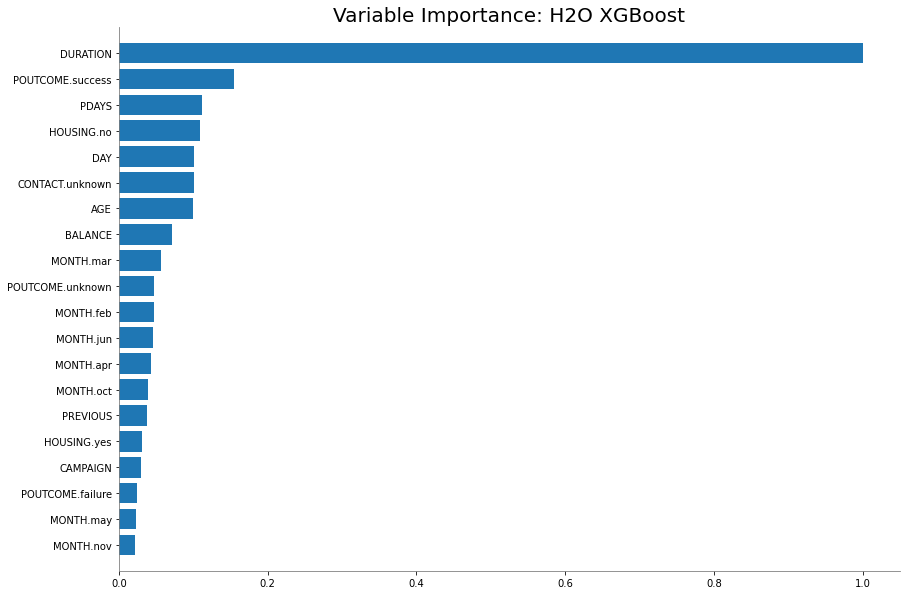

In [54]:
model.varimp_plot(num_of_features=20)